In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.update_layout(width=700, height=500)
# fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()

## Explore Exercises

## 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [1]:
from imports import *
import wrangle_zillow
# set columnns display format
pd.set_option('display.max_columns', None)
# default pandas decimal number display format
pd.options.display.float_format = '{:20,.3f}'.format

## Further Prepare Steps: (prepare.py)

#### Filter single family

In [2]:
df = wrangle_zillow.get_zillow_data()

In [3]:
df.shape

(77574, 67)

In [4]:
# Singel family properties
df = df[df.propertylandusetypeid==261]

In [5]:
df.shape

(52438, 67)

In [6]:
# propertylanusetypeid can be dropped after this step

#### Filter columns and rows with enough non-null values

<AxesSubplot:>

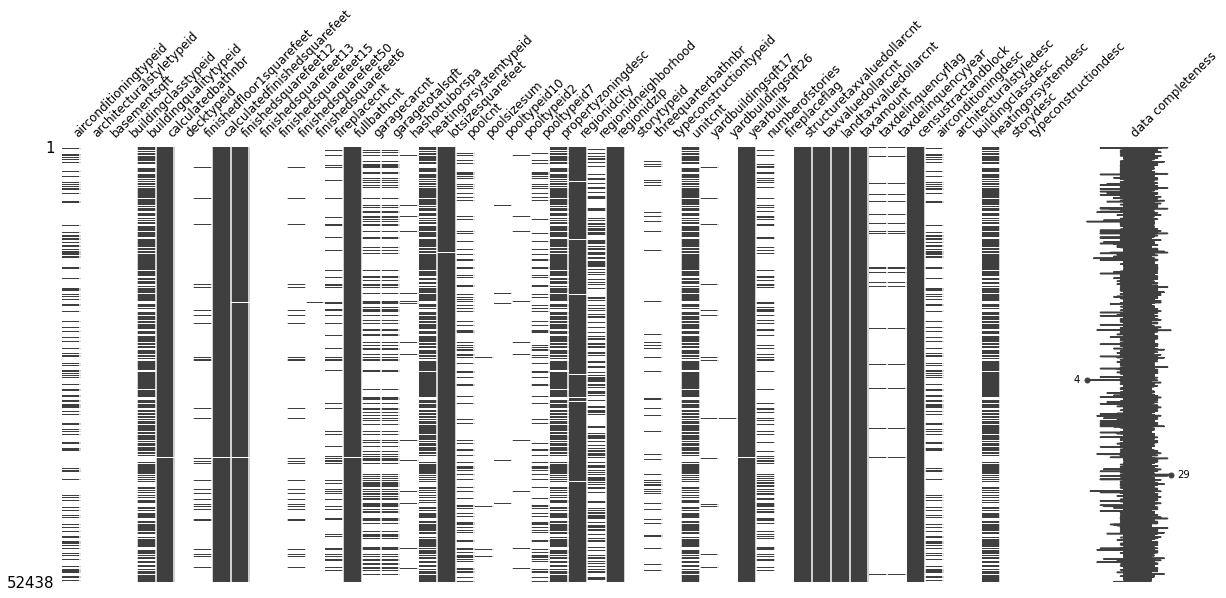

In [7]:
# Visualizing missing values
missingValueColumns = df.columns[df.isnull().any()].tolist()

msno.matrix(df[missingValueColumns], width_ratios = (10, 1), \
           figsize=(20,8), fontsize = 12, sparkline=True, labels = True)

<AxesSubplot:>

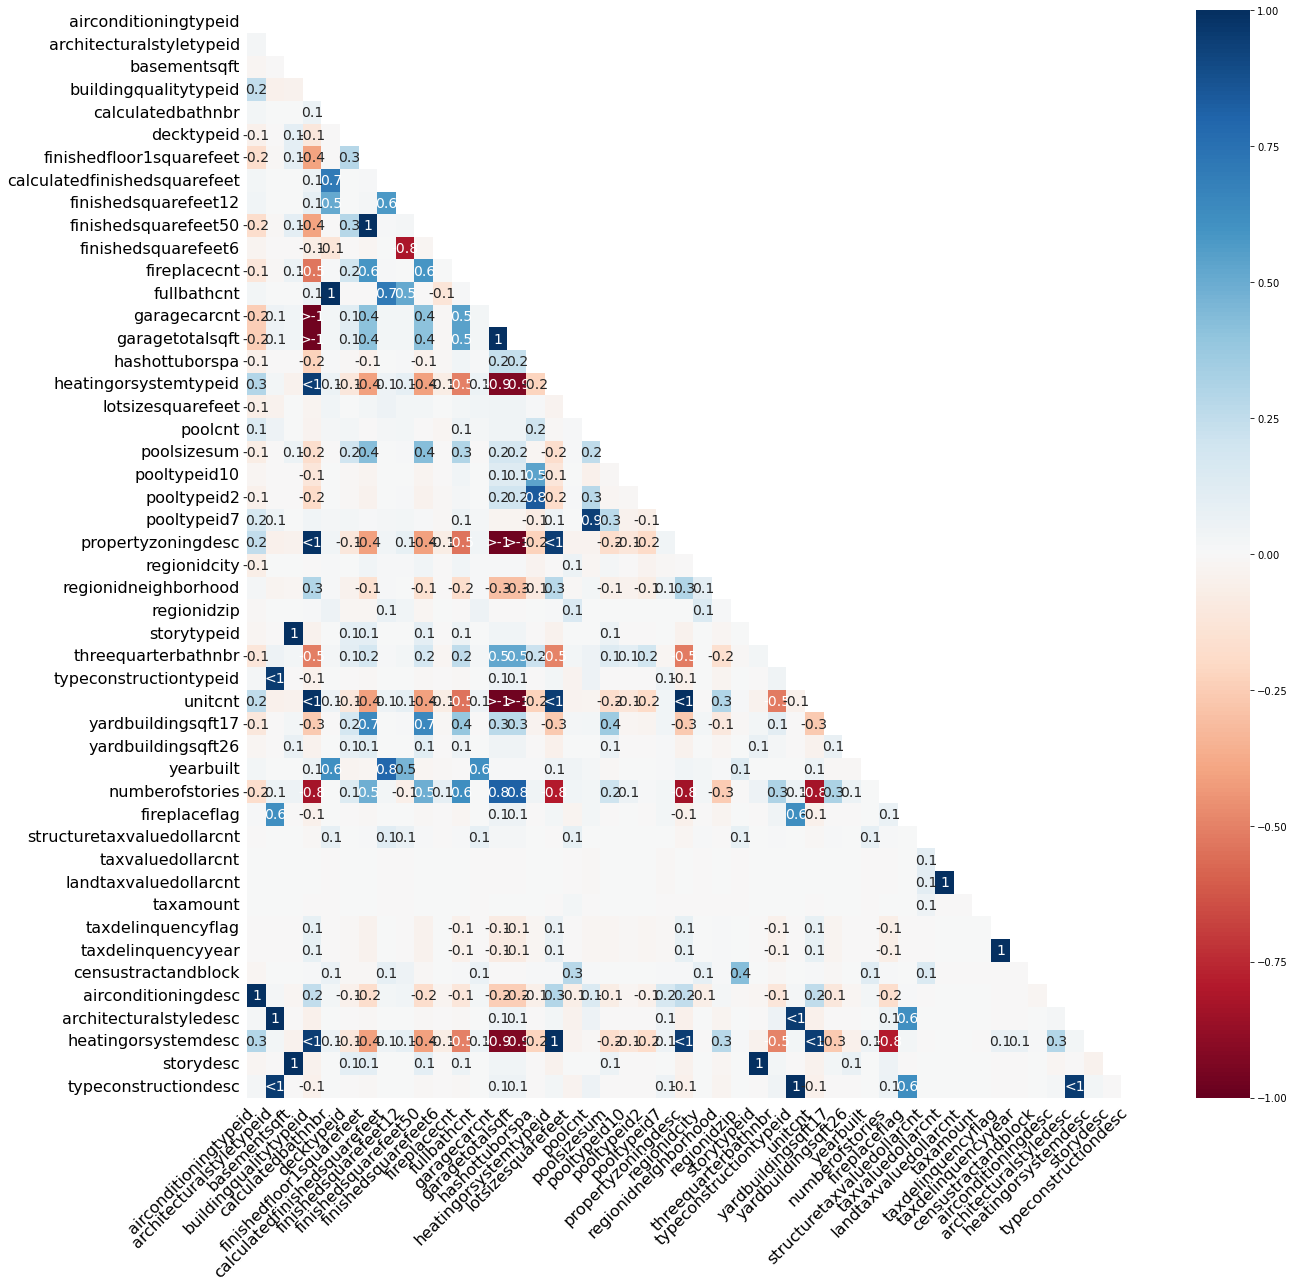

In [8]:
msno.heatmap(df[missingValueColumns],figsize=(20,20))

In [11]:
# Handle missing values
df = wrangle_zillow.handle_missing_values(df, 0.7, 0.75)

In [12]:
df.shape

(52434, 28)

In [8]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                133
calculatedfinishedsquarefeet      78
finishedsquarefeet12             243
fips                               0
fullbathcnt                      133
latitude                           0
longitude                          0
lotsizesquarefeet                366
propertycountylandusecode          0
propertylandusetypeid              0
rawcensustractandblock             0
regionidcity                    1033
regionidcounty                     0
regionidzip                       23
roomcnt                            0
yearbuilt                        112
structuretaxvaluedollarcnt        82
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              119
logerror                           0
transactiondate                    0
p

#### Change columns name (WIP)

In [44]:
df.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'logerror', 'transactiondate',
       'propertylandusedesc', 'age'],
      dtype='object')

In [ ]:
# bathroomcnt -> bathrooms
# bedroomcnt -> bedrooms
# calculatedfinishedsquarefeet -> total_sqft
# lotsizesquarefeet -> lot_size
# regionidcity -> city
# regionidzip -> zip_code
# roomcnt -> total_rooms
# structuretaxvaluedollarcnt -> structure_value
# taxvaluedollarcnt -> assessed_value
# finishedsquarefeet12 -> living_area

#### Create column for age

In [13]:
df['age'] = 2017-df['yearbuilt']

#### Drop nulls

In [40]:
# df = df.dropna(subset=['age'])

In [14]:
df = df.dropna()

In [15]:
df.shape

(50670, 29)

#### Drop columns

In [ ]:
# taxamount
# calculatedbathnbr
# 

#### Drop squarefeet nulls

#### Data mapping for county

#### Change datatypes (WIP)

In [18]:
df.dtypes

parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
unitcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64


In [35]:
df.heatingorsystemdesc.value_counts()

Central       20736
Floor/Wall    12564
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype: int64

**heatingorsystemdesc** distinct, categorical corresponding to **heatingorsystemtypeid**

In [34]:
df.heatingorsystemtypeid.value_counts()

 2.000    20736
 7.000    12564
 6.000      517
20.000       85
13.000       16
 1.000        7
18.000        6
10.000        2
24.000        1
Name: heatingorsystemtypeid, dtype: int64

**heatingorsystemtypeid** distinct, categorical

In [39]:
df.regionidcity.value_counts().head(15)

12,447.000    11449
 5,534.000     1794
40,227.000     1492
46,298.000     1427
16,764.000     1082
25,218.000      951
54,311.000      871
27,110.000      864
34,278.000      851
52,650.000      767
12,773.000      739
33,252.000      684
24,812.000      650
13,150.000      624
53,571.000      603
Name: regionidcity, dtype: int64

**regionidcity** should be converted to Int/String

In [29]:
df.regionidcounty.value_counts()

3,101.000    33892
1,286.000    14090
2,061.000     4377
Name: regionidcounty, dtype: int64

**regionidcounty** categorical, should be converted to Int/String

In [32]:
df.unitcnt.value_counts()

1.000    33816
2.000       29
3.000        1
Name: unitcnt, dtype: int64

**unitcnt** 3 possible values, trim off 2 & 3?

### Uni-Variate

#### Distribution of `logerror`

<AxesSubplot:xlabel='logerror', ylabel='Count'>

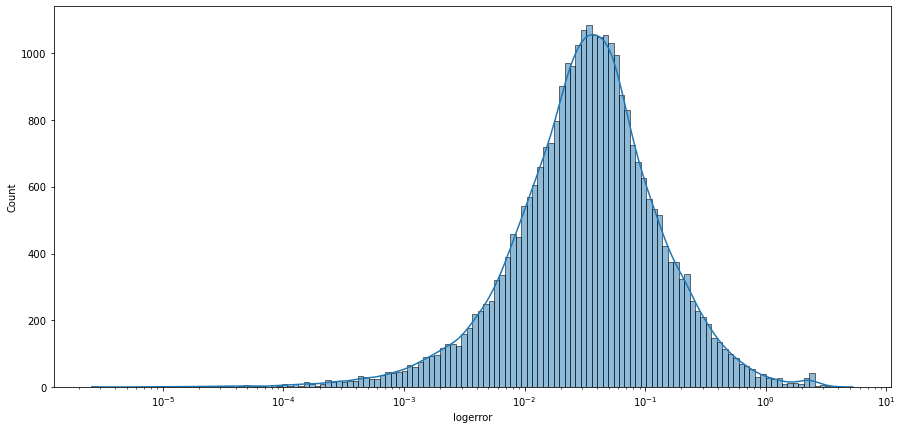

In [42]:
plt.figure(figsize = (15,7))
sns.histplot(data=df, x="logerror", kde=True, log_scale=True)

#### Assessment Year

In [43]:
df.assessmentyear.value_counts()

2,016.000    52322
Name: assessmentyear, dtype: int64

All properties are assessed in 2016.

#### Distribution of `bathroomcnt`, `bedroomcnt`, `calculatedbathnbr`, `calculatedfinishedsquarefeet`, `fullbathcnt`

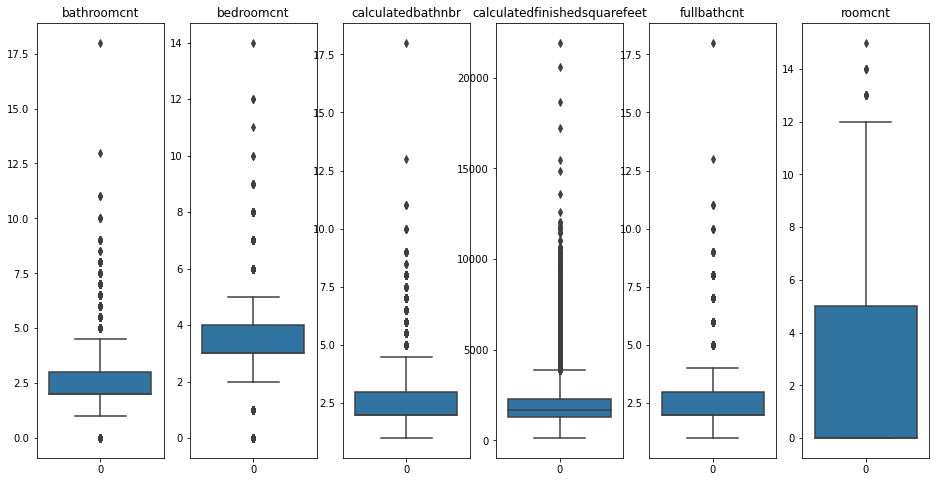

In [30]:
plt.figure(figsize = (16,8))

# List of columns
cols = ['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr','calculatedfinishedsquarefeet','fullbathcnt', 'roomcnt']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,6, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    sns.boxplot(data = df[col])

#### Distribution of `lotsizesquarefeet`

<AxesSubplot:xlabel='lotsizesquarefeet', ylabel='Count'>

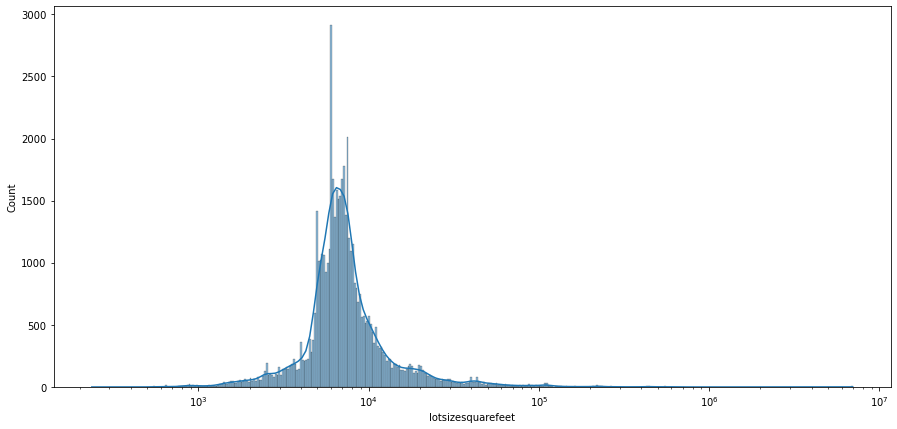

In [22]:
plt.figure(figsize = (15,7))
sns.histplot(data=df, x="lotsizesquarefeet", kde=True, log_scale=True)

Very skewed, long right tail.

#### Distribution of `structuretaxvaluedollarcnt`, `taxvaluedollarcnt`, `landtaxvaluedollarcnt`

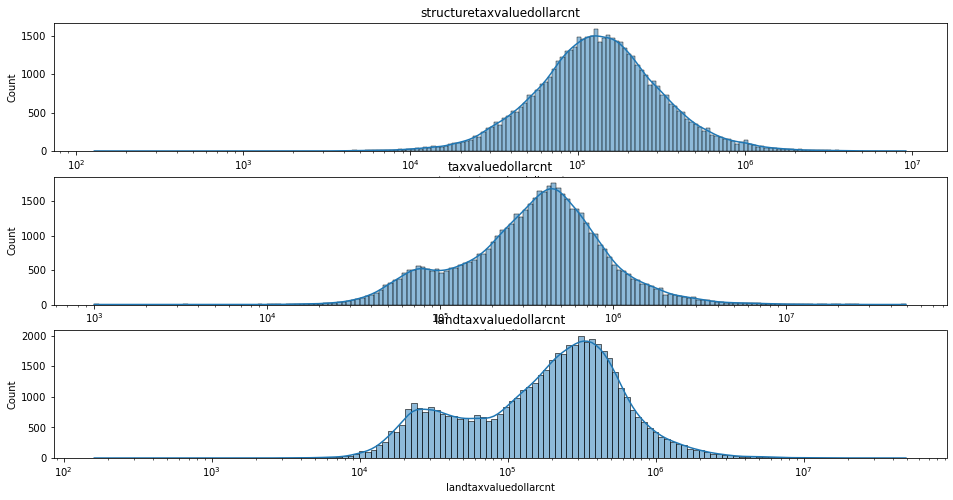

In [37]:
plt.figure(figsize = (16,8))

# List of columns
cols = ['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(3,1, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    sns.histplot(data=df, x=col, kde=True, log_scale=True)

## Questions:

1. Is log error significantly different across different counties?
2. Is there a relationship between log error and the age of the house?
3. Is square feet correlated with log error?
4. Is log error significantly different with different size of bed/bath (num. of bed/bath; small/medium/large)
5. Is log error significantly different across different cities? (zip?)

***

## 2. Answer those questions through a mix of statistical tests and visualizations.

### Split Data

In [16]:
train,validate,test = wrangle_zillow.split(df)

In [17]:
train.shape, validate.shape, test.shape

((28375, 29), (12161, 29), (10134, 29))

## Q1. Is log error significantly different across different counties?

In [12]:
df.fips.value_counts()

6,037.000    33879
6,059.000    14086
6,111.000     4357
Name: fips, dtype: int64

- 6037 Los Angeles
- 6059 Orage
- 6111 Ventura

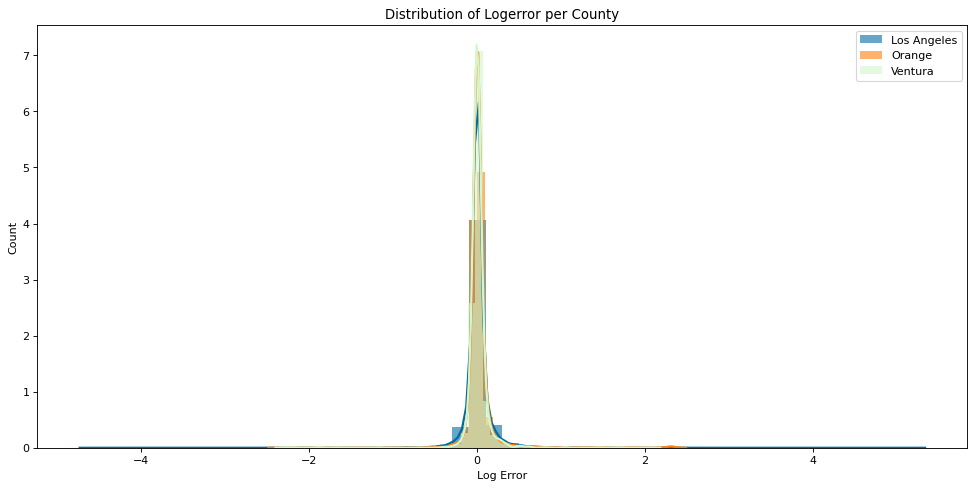

In [13]:
# Visualizing distribution of assessed_value per county

losangeles = train[train['fips'] == 6037].logerror
orange = train[train['fips'] == 6059].logerror
ventura = train[train['fips'] == 6111].logerror

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
sns.distplot(losangeles, color="#006ba4", label="Los Angeles", **kwargs)
sns.distplot(orange, color="#ff800e", label="Orange", **kwargs)
sns.distplot(ventura, color="#D4F6CC", label="Ventura", **kwargs)
plt.xlabel('Log Error')
plt.ylabel('Count')
plt.title('Distribution of Logerror per County')
plt.legend();

<AxesSubplot:xlabel='fips', ylabel='logerror'>

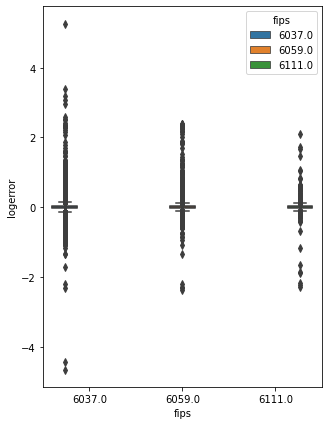

In [25]:
plt.figure(figsize=(5,7))
sns.boxplot(x='fips', y='logerror',hue = 'fips', data = train)

<AxesSubplot:xlabel='fips', ylabel='logerror'>

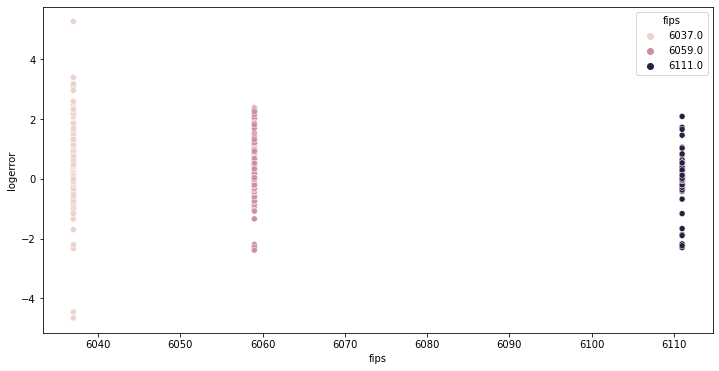

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='fips', y='logerror', hue='fips',data = train)

### ANOVA Test
**Set Hypothesis**

$H_{0}$: Logerror of Los Angeles, Orange, and Ventura County are all equal.

$H_{a}$: Logerror of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal.


**Verify Assumptions**

- Normal: Yes
- Independent: Yes
- Variance: False

In [15]:
# Set alpha
alpha = 0.05

# Comparing mean of 3 independent samples
t, p = stats.f_oneway(losangeles, orange, ventura)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal. ')
else:
    print("We fail to reject H0")

We reject H0.

Mean of property tax assessed value of Los Angeles, Orange, and Ventura County are not all equal. 


***

## Q2. Is there a relationship between log error and the age of the house?

Text(0.5, 1.0, 'Logerror by Age')

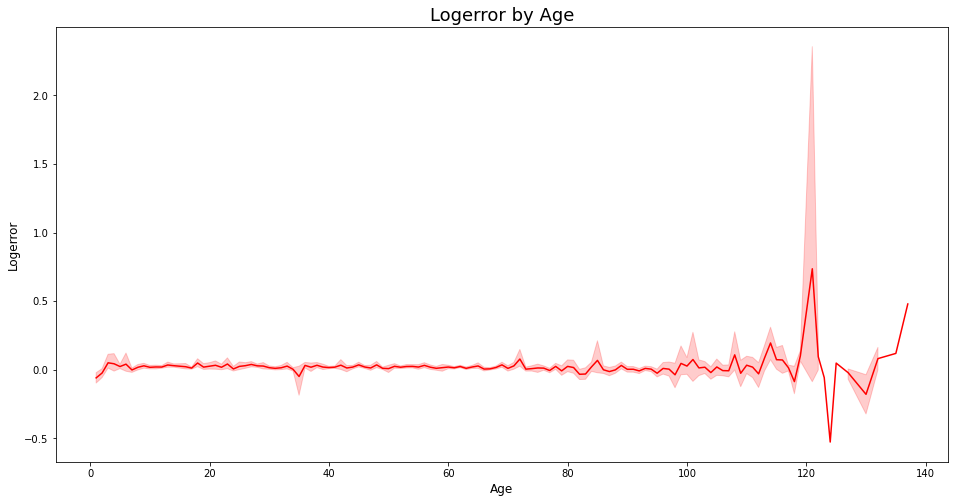

In [16]:
# Visualizing how age of the house is correlated with legerror
plt.figure(figsize = (16,8))
sns.lineplot(x = train.age, y = train.logerror, color = 'red', data = train)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Logerror', fontsize = 12)
plt.title('Logerror by Age', fontsize = 18)

Text(0.5, 1.0, 'Logerror by Age')

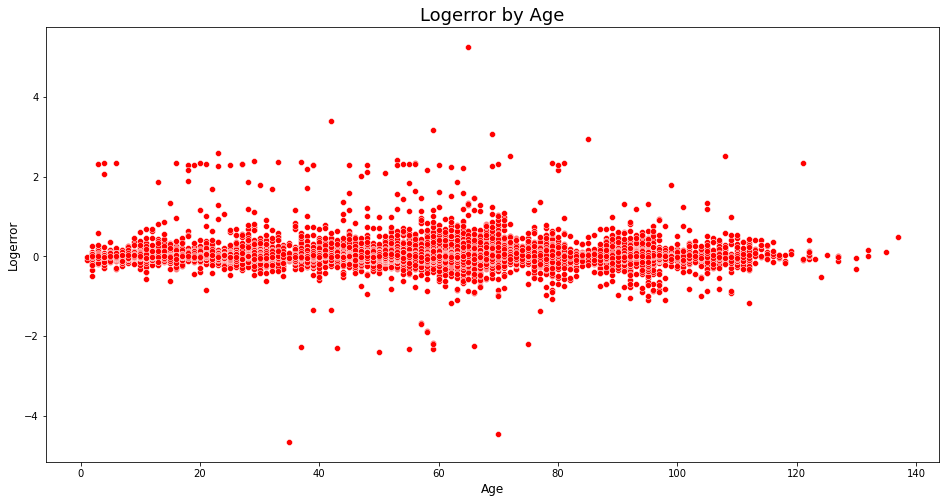

In [27]:
# Visualizing how age of the house is correlated with legerror
plt.figure(figsize = (16,8))
sns.scatterplot(x = train.age, y = train.logerror, color = 'red', data = train)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Logerror', fontsize = 12)
plt.title('Logerror by Age', fontsize = 18)

### Pearson R

In [17]:
r, p = stats.pearsonr(train.logerror, train.age)
r, p

(-0.02860213459298659, 9.75060180607208e-07)

#### Very weak relationship between logerror and age.

***

## Q3. Is square feet correlated with log error?

Text(0.5, 1.0, 'Logerror by Calculated Finished Square Feet')

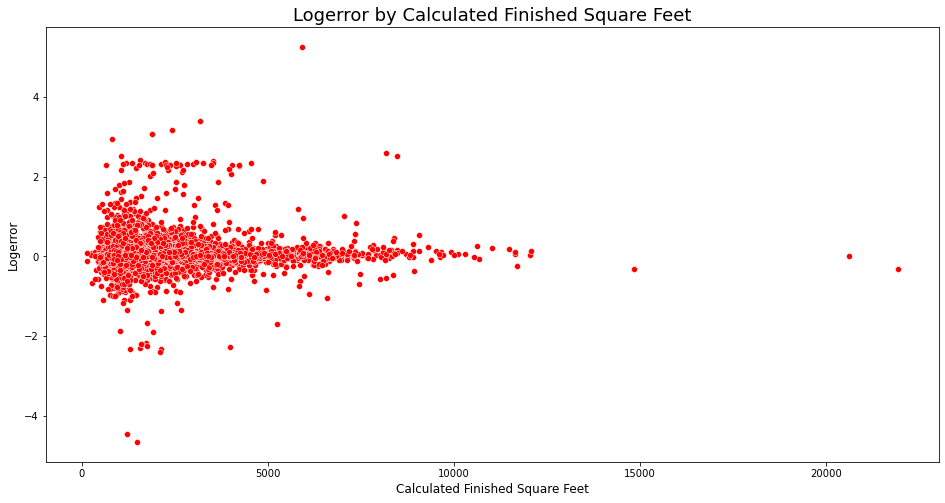

In [22]:
# Visualizing how square feet is correlated with assessed value
plt.figure(figsize = (16,8))
sns.scatterplot(x = train.calculatedfinishedsquarefeet, y = train.logerror, color = 'red', data = train)
plt.xlabel('Calculated Finished Square Feet', fontsize = 12)
plt.ylabel('Logerror', fontsize = 12)
plt.title('Logerror by Calculated Finished Square Feet', fontsize = 18)

<Figure size 288x432 with 0 Axes>

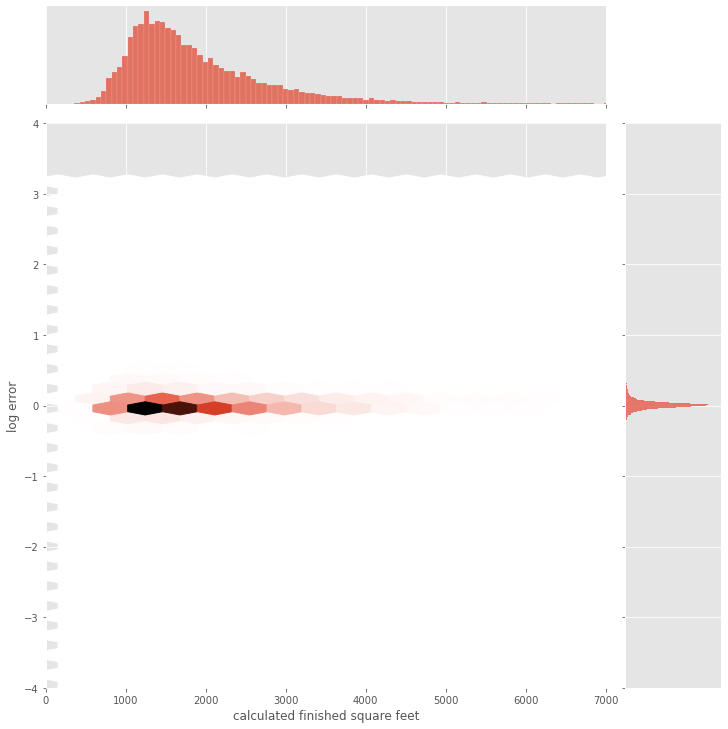

In [29]:
plt.figure(figsize=(4, 6))
sns.jointplot(x = train.calculatedfinishedsquarefeet.values, 
             y = train.logerror.values, size = 10, kind = 'hex')
plt.xlim(0, 7000)
plt.ylim(-4,4)
plt.ylabel('log error', fontsize = 12)
plt.xlabel('calculated finished square feet', fontsize = 12)
plt.show()

### Pearson R

In [14]:
r, p = stats.pearsonr(train.logerror, train.calculatedfinishedsquarefeet)
r, p

(0.048153243901079903, 4.829654382684676e-16)

#### Very weak relationship between squarefeet & logerror

***

## Features Correlation

In [15]:
train_corr = train.corr()
train_corr

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,age
parcelid,1.000,0.086,0.110,0.086,0.087,0.087,0.711,0.033,-0.236,-0.078,-0.014,NaN,0.711,-0.024,-0.529,0.029,0.572,0.236,0.043,0.020,NaN,0.007,-0.000,0.058,0.014,-0.236
bathroomcnt,0.086,1.000,0.641,1.000,0.849,0.849,0.124,0.985,-0.036,0.007,0.031,NaN,0.123,-0.053,-0.163,0.035,0.089,0.518,0.656,0.527,NaN,0.411,0.526,0.009,0.043,-0.518
bedroomcnt,0.110,0.641,1.000,0.641,0.628,0.628,0.149,0.633,-0.003,0.004,0.013,NaN,0.149,-0.048,-0.162,0.025,0.187,0.384,0.385,0.278,NaN,0.199,0.279,0.017,0.046,-0.384
calculatedbathnbr,0.086,1.000,0.641,1.000,0.849,0.849,0.124,0.985,-0.036,0.007,0.031,NaN,0.123,-0.053,-0.163,0.035,0.089,0.518,0.656,0.527,NaN,0.411,0.526,0.009,0.043,-0.518
calculatedfinishedsquarefeet,0.087,0.849,0.628,0.849,1.000,1.000,0.124,0.826,-0.063,0.006,0.041,NaN,0.123,-0.049,-0.160,0.035,0.098,0.455,0.758,0.617,NaN,0.485,0.614,0.007,0.048,-0.455
finishedsquarefeet12,0.087,0.849,0.628,0.849,1.000,1.000,0.124,0.826,-0.063,0.006,0.041,NaN,0.123,-0.049,-0.160,0.035,0.098,0.455,0.758,0.617,NaN,0.485,0.614,0.007,0.048,-0.455
fips,0.711,0.124,0.149,0.124,0.124,0.124,1.000,0.063,-0.064,-0.377,-0.005,NaN,1.000,-0.042,-0.603,0.030,0.745,0.313,0.072,0.029,NaN,0.005,0.004,0.080,0.009,-0.313
fullbathcnt,0.033,0.985,0.633,0.985,0.826,0.826,0.063,1.000,0.016,-0.022,0.033,NaN,0.063,-0.050,-0.077,0.032,0.033,0.471,0.641,0.516,NaN,0.403,0.518,0.004,0.041,-0.471
latitude,-0.236,-0.036,-0.003,-0.036,-0.063,-0.063,-0.064,0.016,1.000,-0.538,0.054,NaN,-0.059,-0.017,0.584,0.014,-0.284,0.027,-0.043,-0.129,NaN,-0.157,-0.099,-0.008,-0.023,-0.027
longitude,-0.078,0.007,0.004,0.007,0.006,0.006,-0.377,-0.022,-0.538,1.000,-0.013,NaN,-0.380,0.006,-0.368,0.029,-0.020,0.114,-0.055,-0.039,NaN,-0.028,-0.046,-0.029,0.029,-0.114


<AxesSubplot:>

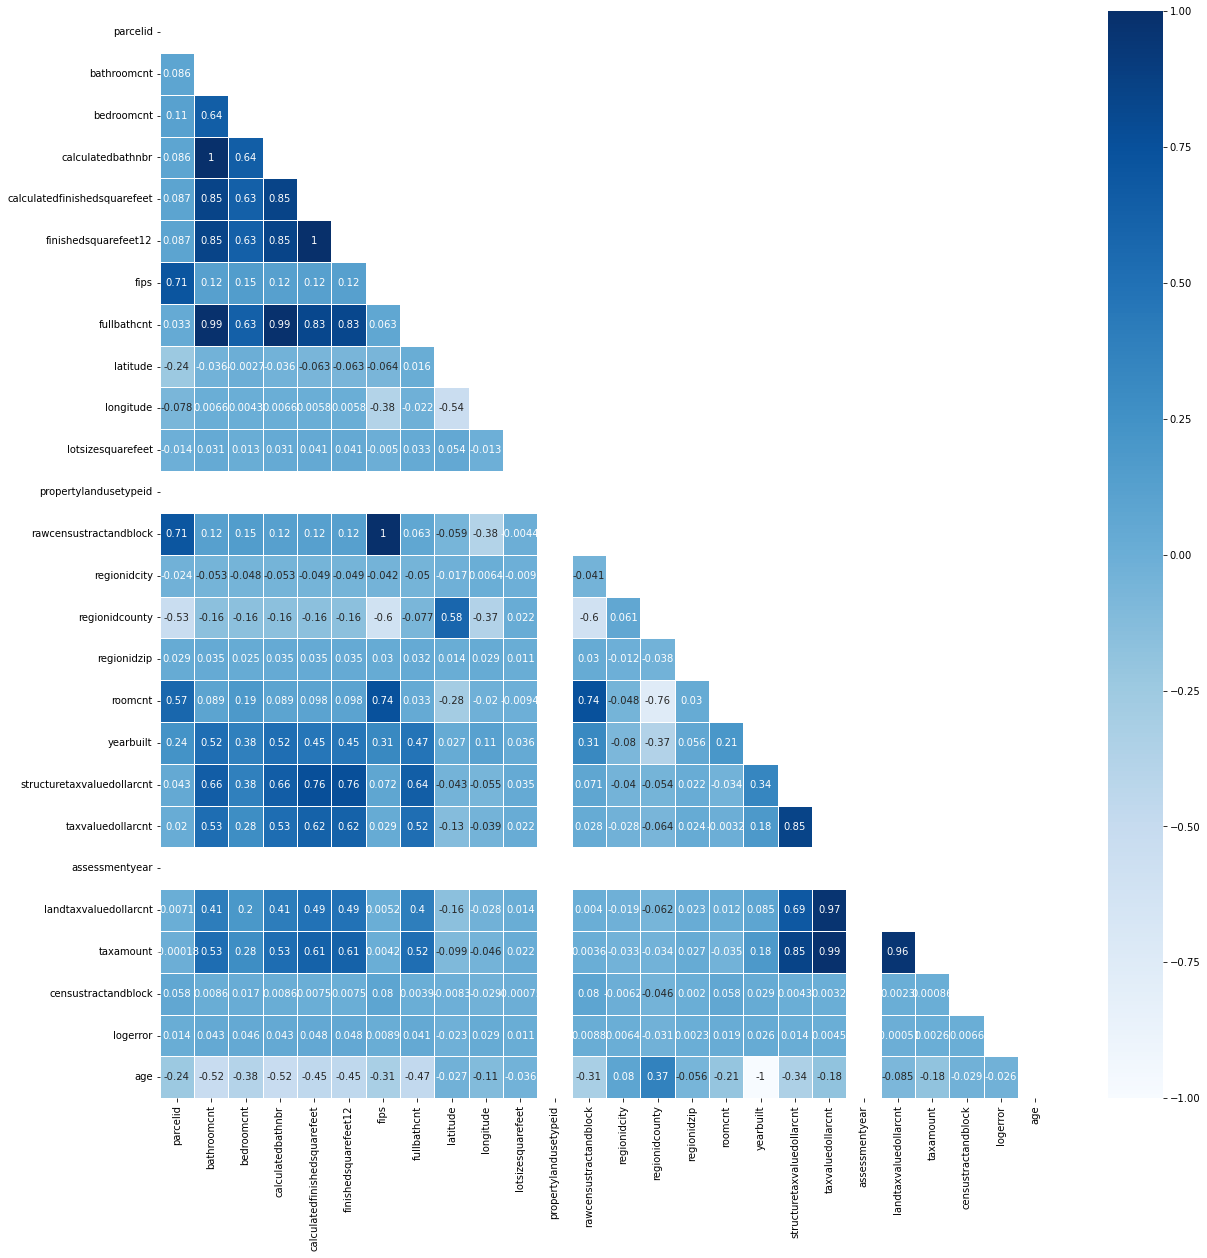

In [17]:
# cols = ['bathroomcnt', 'bedroomcnt', 'fullbathcnt', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips']
plt.figure(figsize = (20,20))
sns.heatmap(train_corr,cmap='Blues', annot=True, linewidth=0.5, mask= np.triu(train_corr))

***

## Q4: 4. Is log error significantly different with different size of bed/bath (num. of bed/bath; small/medium/large)

#### Bedrooms

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

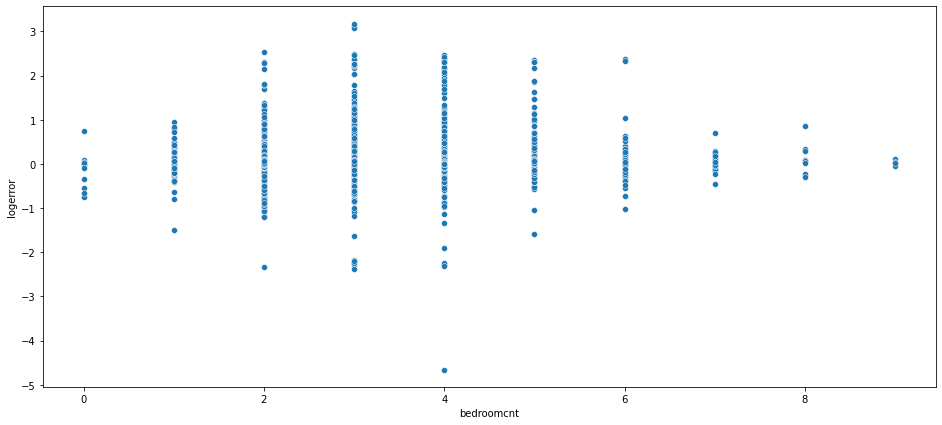

In [21]:
plt.figure(figsize = (16,7))
sns.scatterplot(x='bedroomcnt', y='logerror', data = train)

#### Bathrooms

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

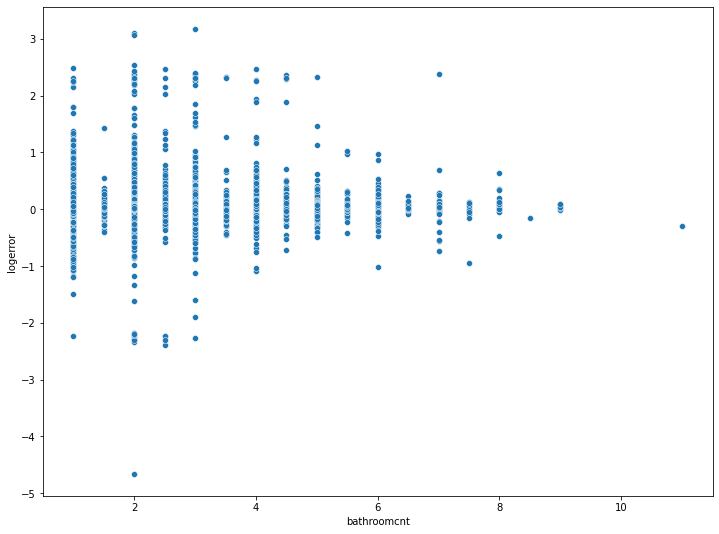

In [22]:
plt.figure(figsize = (12,9))
sns.scatterplot(x='bathroomcnt', y='logerror', data = train)

<AxesSubplot:xlabel='calculatedbathnbr', ylabel='logerror'>

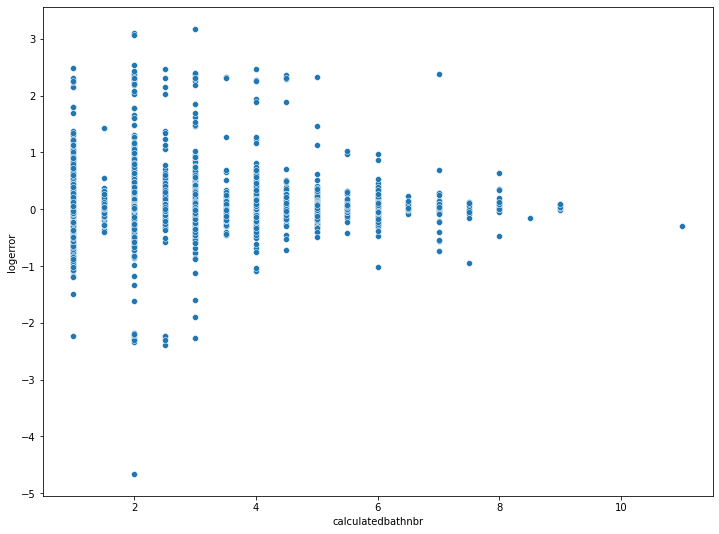

In [26]:
plt.figure(figsize = (12,9))
sns.scatterplot(x='calculatedbathnbr', y='logerror', data = train)

<AxesSubplot:xlabel='fullbathcnt', ylabel='logerror'>

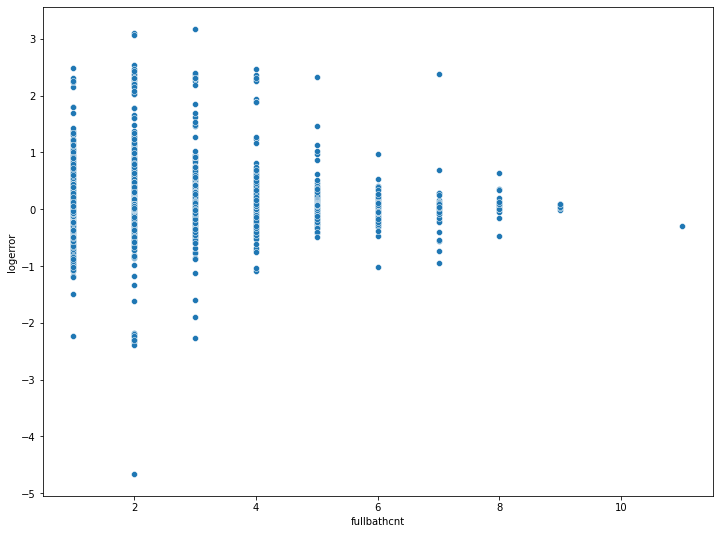

In [24]:
plt.figure(figsize = (12,9))
sns.scatterplot(x='fullbathcnt', y='logerror', data = train)

#### Total Room

<AxesSubplot:xlabel='roomcnt', ylabel='logerror'>

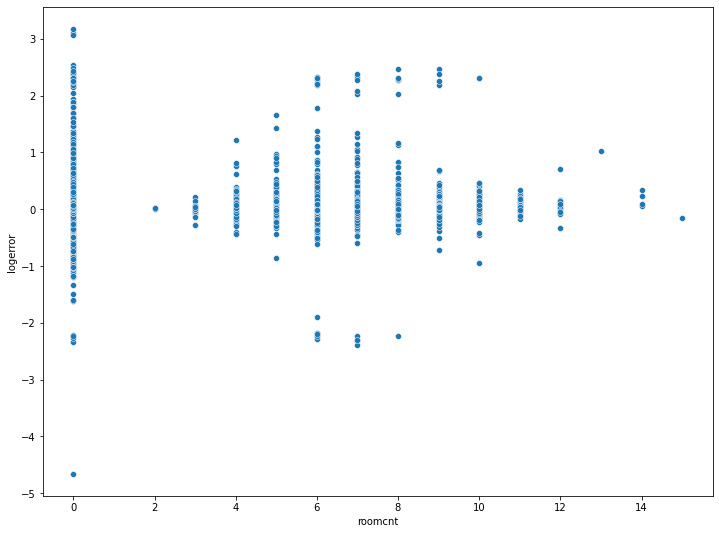

In [27]:
plt.figure(figsize = (12,9))
sns.scatterplot(x='roomcnt', y='logerror', data = train)

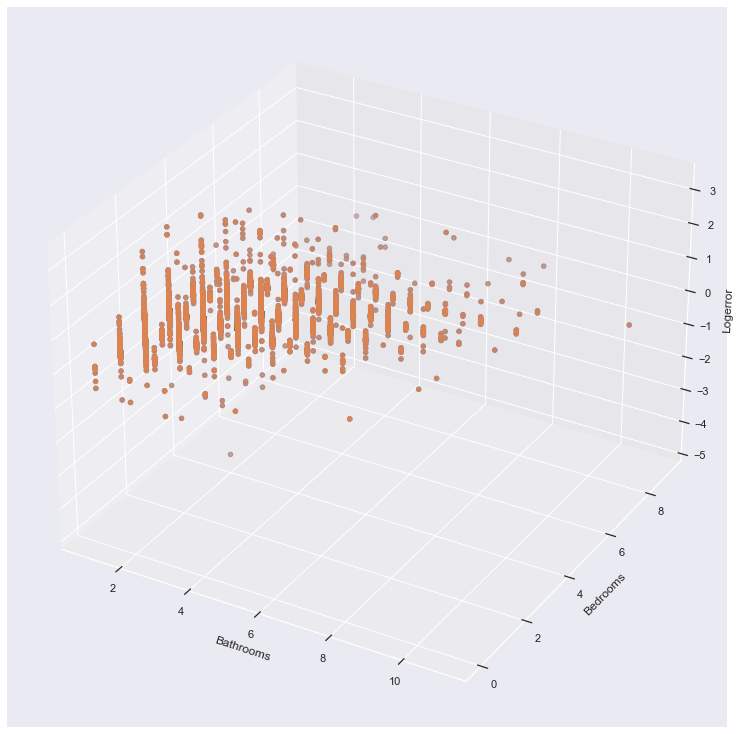

In [60]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(20,10)
ax = Axes3D(fig)

x = train.bathroomcnt
y = train.bedroomcnt
z = train.logerror
ax.scatter(x, y, z)
ax.set_xlabel("Bathrooms")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Logerror")

ax.scatter(x, y, z)

plt.show()

***

## `rawcensustractandblock` and logerror?

In [33]:
df.rawcensustractandblock.value_counts()

60,379,201.162    32
60,590,320.571    24
60,590,320.231    22
60,371,417.002    22
61,110,058.022    20
                  ..
60,372,975.004     1
61,110,033.002     1
60,374,039.022     1
60,374,038.011     1
60,375,034.021     1
Name: rawcensustractandblock, Length: 30590, dtype: int64

Text(0.5, 1.0, 'Logerror by Census Tract and Block')

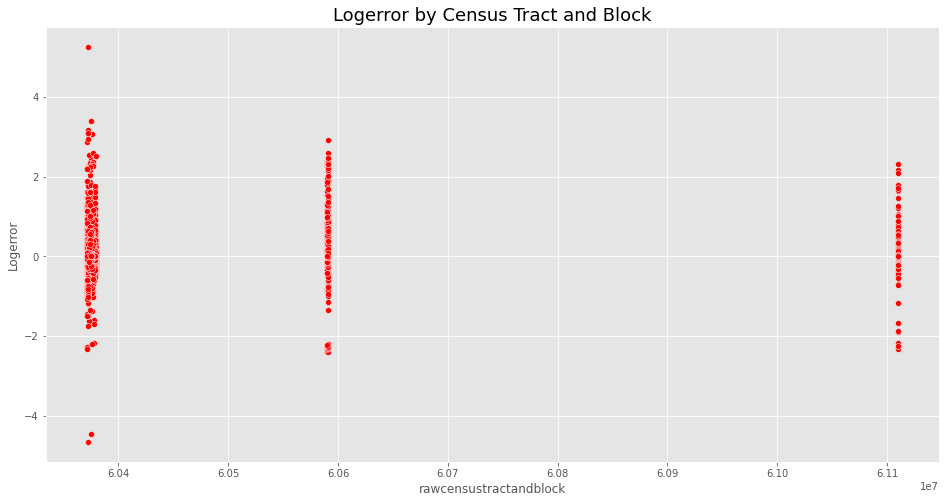

In [52]:
# Visualizing how age of the house is correlated with logerror
plt.figure(figsize = (16,8))
sns.scatterplot(x = df.rawcensustractandblock, y = df.logerror, color = 'red', data = df)
plt.xlabel('rawcensustractandblock', fontsize = 12)
plt.ylabel('Logerror', fontsize = 12)
plt.title('Logerror by Census Tract and Block', fontsize = 18)

## BONUS: Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [48]:
overall_mean = train.logerror.mean()
overall_mean

0.018863867482342353

In [40]:
logerror_zip = train.groupby('regionidzip').logerror.mean().reset_index()

In [53]:
logerror_zip

,regionidzip,logerror
0,"95,982.000",-0.041
1,"95,983.000",0.011
2,"95,984.000",-0.106
3,"95,985.000",-0.022
4,"95,986.000",-0.025
...,...,...
370,"97,329.000",0.016
371,"97,330.000",0.019
372,"97,331.000",0.047
373,"97,344.000",0.032


In [45]:
for row in logerror_zip.index:
    overall_mean = train.logerror.mean()
    alpha = 0.05
    sample = logerror_zip['logerror'][row]
    t, p = stats.ttest_1samp(sample, overall_mean)
    if p/2 < alpha:
        print('zip code ', logerror_zip['regionidzip'][row], 'is significantly')
        if t>0:
            print('higher than the expected error.')
        else:
            print('lower than the expected error.')

In [55]:
t, p = stats.ttest_1samp(6, overall_mean)
t,p

(nan, nan)